<a href="https://colab.research.google.com/github/Aaditya18SP/MSC_Data_Science/blob/windows/et_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data2 = pd.read_csv("/content/tips2.csv")
data2.head()

,bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
#box plots
data2.dtypes
data = data2.select_dtypes(["float64", "int64"])
data


,bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


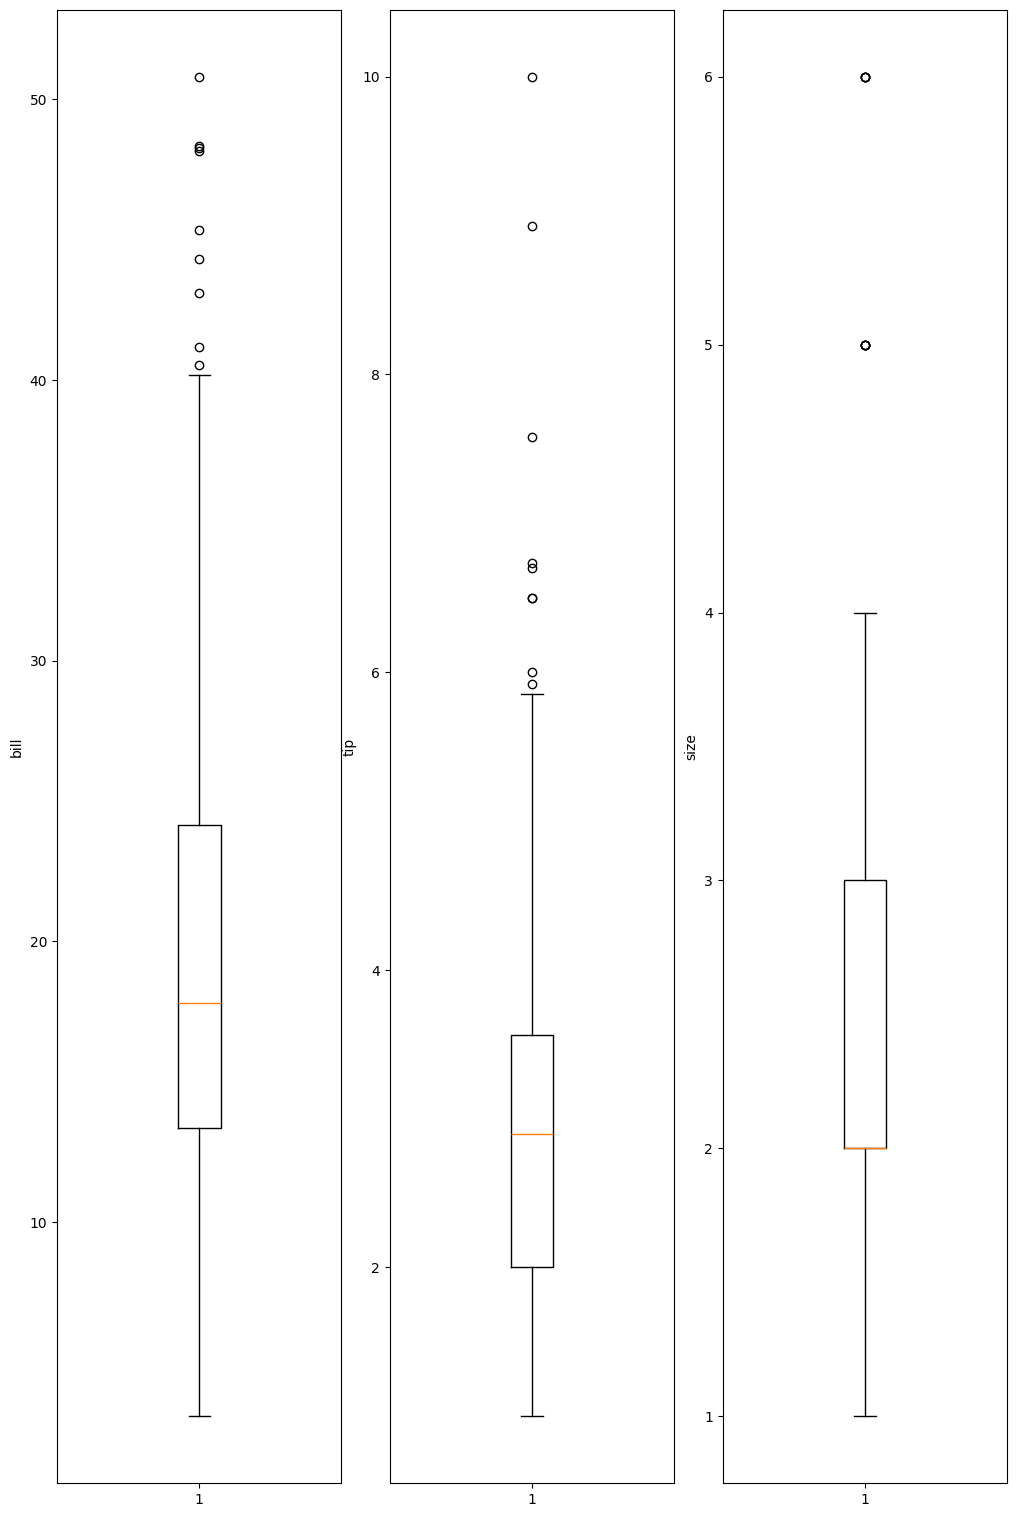

In [11]:
#box plots
fig,axes = plt.subplots(ncols = 3, nrows=1, figsize=(10,15))
axes = axes.flatten()
index =0
for k,v in data.items():
  axes[index].set_ylabel(k)
  axes[index].boxplot(v)
  index+=1
fig.tight_layout(pad=0.1)
plt.show()

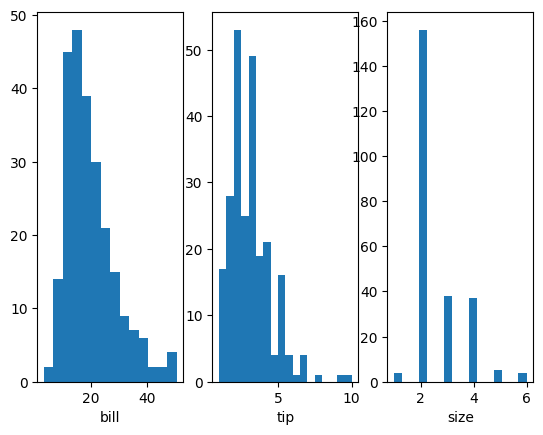

In [13]:
# histograms
fig,axes = plt.subplots(ncols=3)
axes= axes.flatten()
index =0
for k, v in data.items():
  axes[index].set_xlabel(k)
  axes[index].hist(v, bins="auto", density=False)
  index+=1
plt.show()

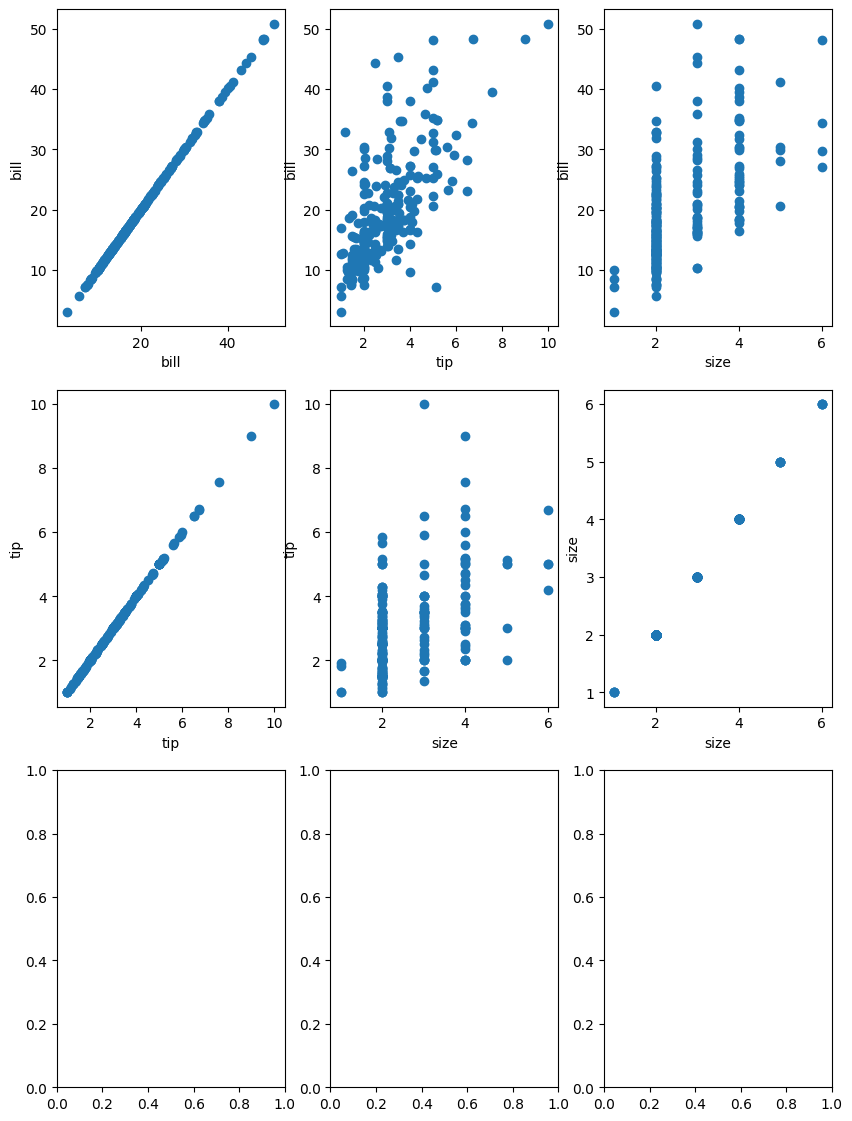

In [17]:
#scatter plots
fig, axes = plt.subplots(ncols =3, nrows=3, figsize=(10,14))
axes=axes.flatten()
index =0
done = []
for k, v in data.items():
  for k1, v1 in data.items():
    if({k,k1} in done):
      continue
    axes[index].set_ylabel(k)
    axes[index].set_xlabel(k1)
    axes[index].scatter(v1,v)
    index+=1
    done.append({k,k1})
plt.show()


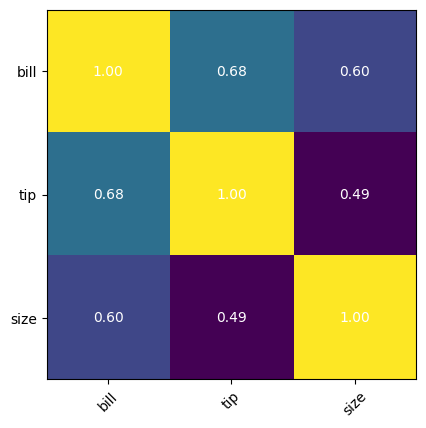

In [18]:
#heatmaps
corr = data.corr()
fig,ax = plt.subplots()
ax.set_xticks(range(len(data.columns)), labels=data.columns, rotation=45, ha="center")
ax.set_yticks(range(len(data.columns)), labels=data.columns)

ax.imshow(corr)
for i in range(len(data.columns)):
  for j in range(len(data.columns)):
    ax.text(j,i,"{:.2f}".format(corr.iloc[i,j]), color="w", ha="center", va="center")
plt.show()

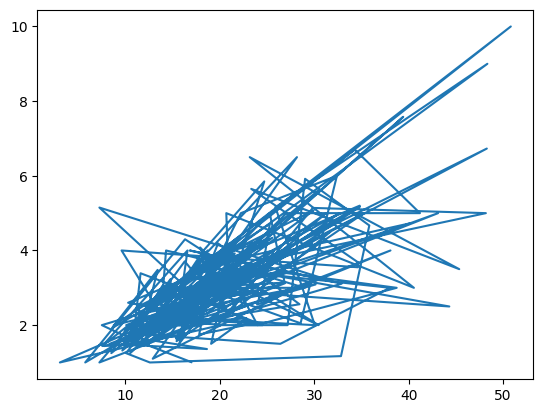

In [22]:
#line charts
fig,ax = plt.subplots()
ax.plot(data.bill, data.tip)
plt.show()

([<matplotlib.patches.Wedge at 0x7d0325b262d0>,
 [Text(0.47909423581850485, 0.990186201280084, 'Female'),
  Text(-0.47909423581850474, -0.990186201280084, 'Male')],
 [Text(0.26132412862827537, 0.5401015643345912, '35.7%'),
  Text(-0.26132412862827525, -0.5401015643345912, '64.3%')])

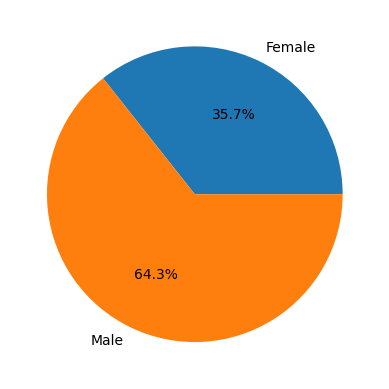

In [29]:
#pie chart
fig,ax = plt.subplots()
d2 = data2.groupby("gender").count()
ax.pie(d2["bill"], labels=d2.index, autopct='%1.1f%%')
